# 取引履歴のデータ分析

In [1]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
matplotlib.use("TkAgg")

In [3]:
current_dir = %pwd
timestamp = os.path.basename(current_dir)

In [4]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../../'

/home/tsu-nera/repo/bakuchi


In [5]:
from src.utils.trade_analysis import TradeAnalysis

%reload_ext autoreload
%autoreload 2

File doesn't exist 


In [6]:
ta = TradeAnalysis(timestamp)

In [7]:
cc_trades = ta.get_coincheck_trades_df()
lq_trades = ta.get_liquid_trades_df()

In [8]:
len(cc_trades), len(lq_trades)

(30, 30)

## トレード結果

In [9]:
ta.display()

トレード情報
+---------------------+---------------------+
|          レコード数 |                3755 |
+---------------------+---------------------+
|            取引回数 |                  30 |
+---------------------+---------------------+
|            開始日時 | 2020-03-24 17:47:37 |
+---------------------+---------------------+
|            終了日時 | 2020-03-24 18:50:02 |
+---------------------+---------------------+
|         取引時間[H] |     0 days 01:02:25 |
+---------------------+---------------------+
|       取引単位[BTC] |               0.006 |
+---------------------+---------------------+
|   利確しきい値[JPY] |                2000 |
+---------------------+---------------------+
| 損切りマージン[JPY] |                1000 |
+---------------------+---------------------+

トレード結果
+-------------+-------+
| 開始[JPY]   | 10041 |
+-------------+-------+
| 終了[JPY]   | 10074 |
+-------------+-------+
| 利益[JPY]   |    33 |
+-------------+-------+
| 開始[BTC]   | 0.021 |
+-------------+-------+
| 終了[BTC]   | 0.021 |
+----------

## 取引履歴

In [10]:
profit_df = ta.create_profit_df()

In [11]:
profit_df.tail(30)

,cc_side,cc_price,lq_side,lq_price,profit
timestamp,,,,,
2020-03-24 17:47:37,sell,4458.000,buy,4456.992,1.008
2020-03-24 17:47:46,buy,4454.993,sell,4452.312,-2.681
2020-03-24 17:52:46,sell,4460.736,buy,4460.142,0.594
2020-03-24 17:53:03,buy,4456.997,sell,4458.516,1.519
2020-03-24 18:00:10,sell,4470.000,buy,4468.470,1.530
2020-03-24 18:01:12,buy,4466.995,sell,4470.714,3.719
2020-03-24 18:05:05,sell,4461.508,buy,4463.556,-2.048
2020-03-24 18:05:08,buy,4463.997,sell,4469.988,5.991
2020-03-24 18:05:23,sell,4455.396,buy,4455.900,-0.504


In [12]:
round(sum(profit_df.profit), 3)

33.764

## トレードグラフ

In [13]:
cc_ticks = ta.get_coincheck_ticks_df()
lq_ticks = ta.get_liquid_ticks_df()

In [14]:
len(cc_ticks), len(lq_ticks)

(3755, 3755)

In [15]:
cc_bids = cc_ticks['bid']
cc_asks = cc_ticks['ask']
lq_bids = lq_ticks['bid']
lq_asks = lq_ticks['ask']

fig1, ax1 = ta.get_fig(cc_bids, lq_asks)
fig2, ax2 = ta.get_fig(lq_bids, cc_asks)

ax1.set_title('coincheck bid/liquid ask')
ax2.set_title('liquid bid/coincheck ask')

Text(0.5, 1, 'liquid bid/coincheck ask')

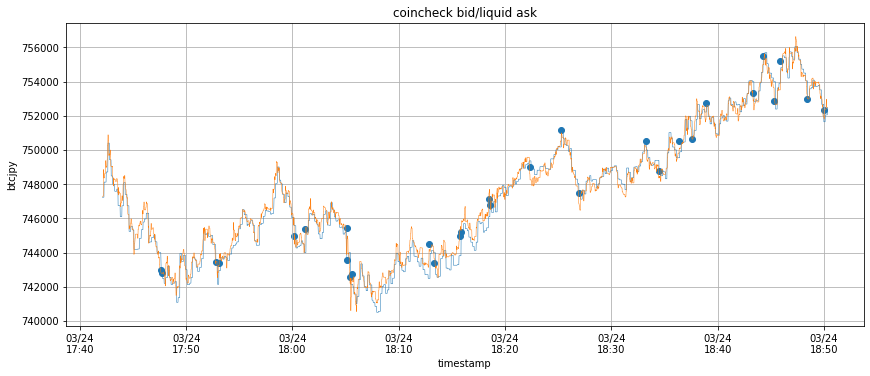

In [16]:
fig1

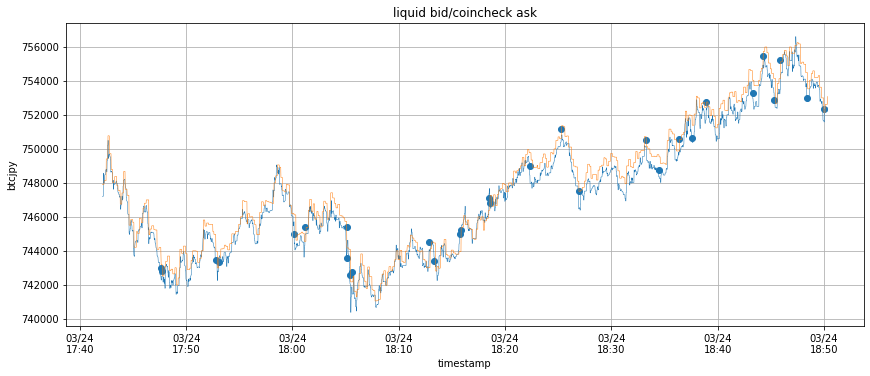

In [17]:
fig2